### Project 06

* Knock-in payoff is given as below

$$F(S) =exp(-rT) \cdot 1000\cdot I(S_T > K)\cdot I(min_{1 \leq k \leq m} S (t_k) < H) $$

* Crude Monte Carlo simulation can be sampled from the below normal random distribution f(x)

$$ S_t = S_0 * exp(L_n)  $$
$$ L_n = \sum_{i=1}^{m}X_i  $$
$$ X_i \backsim N((r-\frac{\sigma^2}{2})\delta t,\sigma^2 \delta t)  $$

* If Importance Sampling (IS) is adopted, the alternative normal random distribution g(x) and the likelihood ratio are as follows

$$ X_i \backsim N((r-\frac{\sigma^2}{2})\delta t-b,\sigma^2 \delta t)  $$
$$ \frac {f(x_1,x_2,...,x_m)}{g(x_1,x_2,...,x_m)} = exp(-\frac{1}{2}\sum_{k=1}^{m}{\frac{(x_k-\mu)}{\sigma \sqrt{\delta t}}}^2) \cdot exp(\frac{1}{2}\sum_{k=1}^{m}{\frac{(x_k-\mu+b)}{\sigma \sqrt{\delta t}}}^2)  $$

* The payoff is as below (The sampling should follow the alternative pdf g(x))

$$ \frac {f(x_1,x_2,...,x_m)}{g(x_1,x_2,...,x_m)}* F^{g(x)}(S) $$


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

* Input paramters

In [5]:
#risk-free rate
r=0.05
#volatility
vol=0.15
#initial price
S0=95
#maturity
T=0.25
#time steps
m=50
#barrier price
H=85
#maturity price
K=96
#number of MC simulation
k=1000
#simulation time for each MC
n=1000

#time interval
dt=T/m

* equivalent mu and sig
* b value determined from the following equation
$$ b=\frac{1}{m} log(\frac{S_0}{H}) $$

In [6]:
b=math.log(S0/H)/m
c=math.log(K/S0)

mudt2=(r-0.5*vol**2)*dt-b
mudt1=(r-0.5*vol**2)*dt

In [8]:
sidt=vol*np.sqrt(dt)

NCrossed=np.zeros(k)

#Payoff=np.zeros(k)
Times=np.zeros(k)
StockVals=np.zeros(k)
ISRatio=np.zeros(k)

Ncrossed=0
TBreach=0
Price=np.zeros(n)

for counter in range(n):
    Payoff=np.zeros(k)
    for i in range(k):
        vetZ=np.random.normal(mudt2,sidt,m)
        ##vetZ2=np.hstack()
        vetZ2=np.hstack((math.log(S0),vetZ))
        LogPath=np.cumsum(vetZ2)
        St=np.exp(LogPath)


        jcross=0
        for j in range(len(St)):
            if St[j]<H:
                jcross=j
                break
            #print(jcross)
            #the path crosses the lower barrier
        if jcross>0:
                
            #TBreach=jcross-1
            #Times[Ncrossed]=TBreach*dt
            #StockVals[Ncrossed]=St[jcross]
            #ISRatio[Ncrossed]=np.exp(TBreach*b**2/2/vol**2/dt+b/vol**2/dt*np.sum(vetZ[1:TBreach])-TBreach*b/vol**2*(r-vol**2/2))
            ISRatio[Ncrossed]=np.exp(m*b**2/2/vol**2/dt+b/vol**2/dt*np.sum(vetZ)-m*b/vol**2*(r-vol**2/2))
                
            if St[-1]>K:
                Payoff[Ncrossed]=ISRatio[Ncrossed]*1000*np.exp(-r*T)
                Ncrossed=Ncrossed+1
        
    Price[counter]=np.sum(Payoff)/k   
    #print(counter)    
print('The final payoff is: ',np.mean(Price))

The final payoff is:  0.5351579575126676


* Plotting

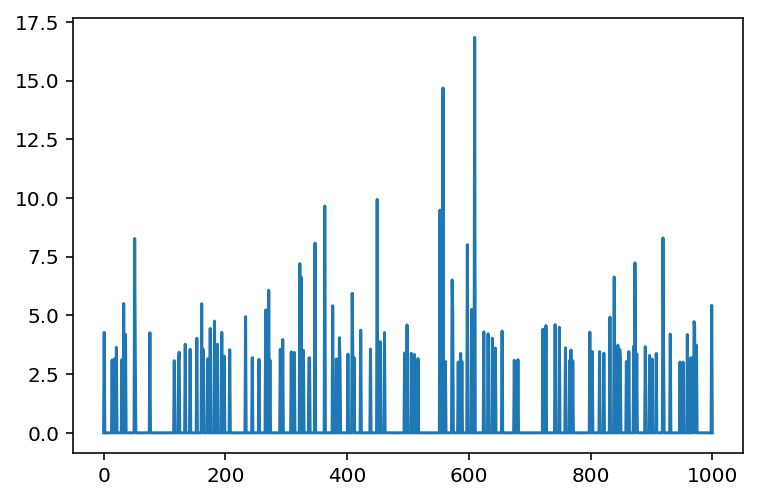

In [9]:
plt.plot(np.linspace(0,n,n),Price)
plt.show()

In [10]:
mean=np.mean(Price)
print('The mean is ',mean)
std=np.sqrt(np.mean((Price-np.mean(Price)**2)))
print('The standard is ',std)
print('The 95 percent confidence interval is between %4.3f and %4.3f' %(mean-2*std,mean+2*std)) 

The mean is  0.5351579575126676
The standard is  0.4987623863359561
The 95 percent confidence interval is between -0.462 and 1.533
